In [3]:
# Unzip the file with space in its name
!unzip -q "/content/Teeth DataSet.zip" -d "/content"


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.image as mpimg

# Define dataset paths
base_dir = "/content/Teeth DataSet/Teeth_Dataset"
train_dir = os.path.join(base_dir, "Training")
val_dir = os.path.join(base_dir, "Validation")
test_dir = os.path.join(base_dir, "Testing")


In [ ]:
import shutil
import os

# Define the unwanted folder names
unwanted_folders = ['out', 'output', 'outputs']

# Base path
test_dir = "/content/Teeth DataSet/Teeth_Dataset/Testing"

# Delete them if they exist
for folder_name in unwanted_folders:
    folder_path = os.path.join(test_dir, folder_name)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f" Deleted: {folder_path}")
    else:
        print(f" Not found: {folder_path}")


❌ Not found: /content/Teeth DataSet/Teeth_Dataset/Testing/out
❌ Not found: /content/Teeth DataSet/Teeth_Dataset/Testing/output
✅ Deleted: /content/Teeth DataSet/Teeth_Dataset/Testing/outputs


In [ ]:
# List all subdirectories in the training folder (each subdirectory is a disease class)
classes = sorted(os.listdir(train_dir))

# Print out all class names in the dataset
print("Disease Classes:")
for cls in classes:
    print("-", cls)


Disease Classes:
- CaS
- CoS
- Gum
- MC
- OC
- OLP
- OT


In [ ]:
# Loop over each dataset split (Train, Val, Test) along with its corresponding folder path
for split, folder in zip(['Train', 'Val', 'Test'], [train_dir, val_dir, test_dir]):
    print(f"\n{split} Set:")  # Print which set we're counting images from
    
    # Loop through each class in the dataset
    for cls in classes:
        # Count the number of images in the current class folder
        count = len(os.listdir(os.path.join(folder, cls)))
        print(f"  {cls}: {count} images")  # Print the image count for that class



Train Set:
  CaS: 480 images
  CoS: 450 images
  Gum: 360 images
  MC: 540 images
  OC: 324 images
  OLP: 540 images
  OT: 393 images

Val Set:
  CaS: 160 images
  CoS: 149 images
  Gum: 120 images
  MC: 180 images
  OC: 108 images
  OLP: 180 images
  OT: 131 images

Test Set:
  CaS: 160 images
  CoS: 149 images
  Gum: 120 images
  MC: 180 images
  OC: 108 images
  OLP: 180 images
  OT: 131 images


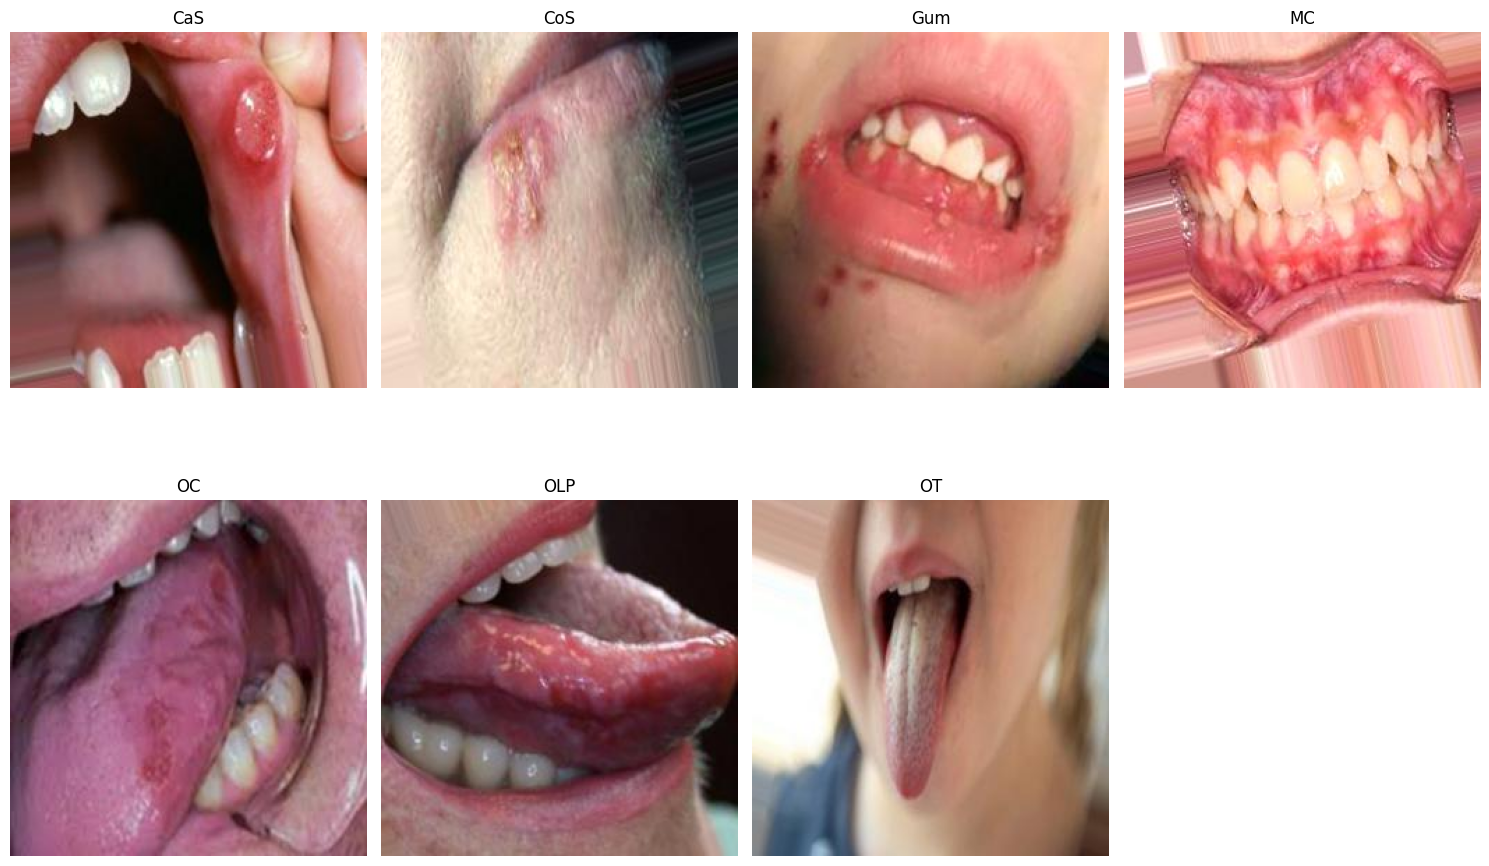

In [ ]:
# Create a new figure for displaying images, with specified width and height
plt.figure(figsize=(15, 10))

# Loop through each class to display one random image per class
for i, cls in enumerate(classes):
    folder = os.path.join(train_dir, cls)  # Get the path to the current class folder
    img_name = random.choice(os.listdir(folder))  # Randomly pick an image file from the class folder
    img_path = os.path.join(folder, img_name)  # Full path to the selected image
    img = mpimg.imread(img_path)  # Load the image using matplotlib

    plt.subplot(2, 4, i+1)  # Create a subplot for displaying this image
    plt.imshow(img)  # Show the image
    plt.title(cls)  # Set the title to the class name
    plt.axis('off')  # Hide axis ticks and labels

# Automatically adjust layout to avoid overlapping elements
plt.tight_layout()
plt.show()  # Display all the images


In [ ]:
# Define the image size and batch size to be used throughout training
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define data augmentation and preprocessing for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to the range [0, 1]
    rotation_range=15,           # Randomly rotate images up to 15 degrees
    width_shift_range=0.1,       # Shift images horizontally by up to 10% of width
    height_shift_range=0.1,      # Shift images vertically by up to 10% of height
    zoom_range=0.1,              # Randomly zoom into images by up to 10%
    horizontal_flip=True         # Randomly flip images horizontally
)

# Define preprocessing for validation and test sets (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generator for the training set
train_gen = train_datagen.flow_from_directory(
    train_dir,                   # Path to training data
    target_size=IMG_SIZE,        # Resize all images to 224x224
    class_mode='categorical',    # Use one-hot encoded labels
    batch_size=BATCH_SIZE,       # Number of images per batch
    shuffle=True                 # Shuffle training data
)

# Create data generator for the validation set
val_gen = val_test_datagen.flow_from_directory(
    val_dir,                     # Path to validation data
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

# Create data generator for the test set
test_gen = val_test_datagen.flow_from_directory(
    test_dir,                    # Path to test data
    target_size=IMG_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False                # Do not shuffle so predictions align with true labels
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [ ]:
# Define a sequential Convolutional Neural Network (CNN) model
model = tf.keras.models.Sequential([
    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),

    # First max pooling layer: reduces spatial dimensions by taking max over 2x2 areas
    tf.keras.layers.MaxPooling2D(2,2),

    # Second convolutional layer: 64 filters, 3x3 kernel
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

    # Second max pooling layer
    tf.keras.layers.MaxPooling2D(2,2),

    # Third convolutional layer: 128 filters, 3x3 kernel
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),

    # Third max pooling layer
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the 3D output to a 1D feature vector
    tf.keras.layers.Flatten(),

    # Fully connected (dense) hidden layer with 128 units
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer with 7 units (one per class), using softmax to get probabilities
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with appropriate optimizer, loss function, and evaluation metric
model.compile(
    optimizer='adam',                      # Adaptive learning rate optimizer
    loss='categorical_crossentropy',       # Loss function for multi-class classification
    metrics=['accuracy']                   # Track accuracy during training and validation
)

# Train the model on the training data and validate it on the validation set
history = model.fit(
    train_gen,                             # Training data generator
    validation_data=val_gen,               # Validation data generator
    epochs=10                              # Number of times to iterate over the training data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1811 - loss: 2.4270

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.1816 - loss: 2.4228 - val_accuracy: 0.2772 - val_loss: 1.8029
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.3002 - loss: 1.7356 - val_accuracy: 0.4144 - val_loss: 1.6293
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.4000 - loss: 1.6030 - val_accuracy: 0.4523 - val_loss: 1.4017
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 369s 4s/step - accuracy: 0.4465 - loss: 1.4272 - val_accuracy: 0.5097 - val_loss: 1.3319
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.4854 - loss: 1.3469 - val_accuracy: 0.5214 - val_loss: 1.3194
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.5174 - loss: 1.3365 - val_accuracy: 0.5661 - val_loss: 1.1498
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.5667 - loss: 1.1820 - val_accuracy: 0.6089 - val_loss: 1.0700
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.5913 - loss: 1.1132 - val_accuracy: 0.6352 - val_loss: 0.

In [27]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 29s 882ms/step - accuracy: 0.7286 - loss: 0.8096
Test Accuracy: 0.69


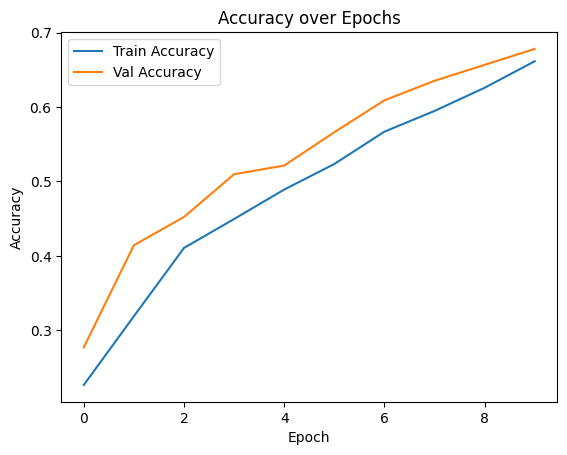

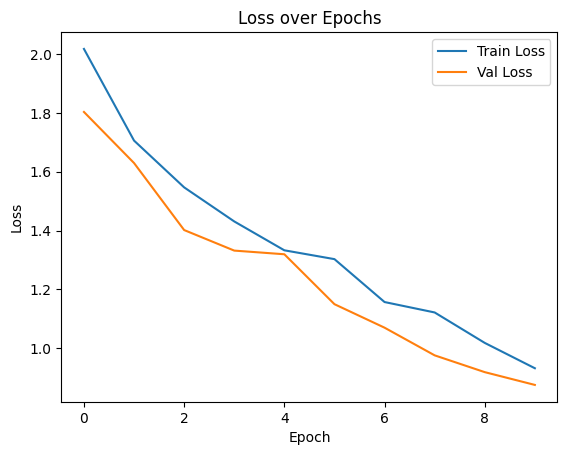

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
# Re-run prediction on test set
pred_probs = model.predict(test_gen)
pred_classes = np.argmax(pred_probs, axis=1)

# True labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())


33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 900ms/step


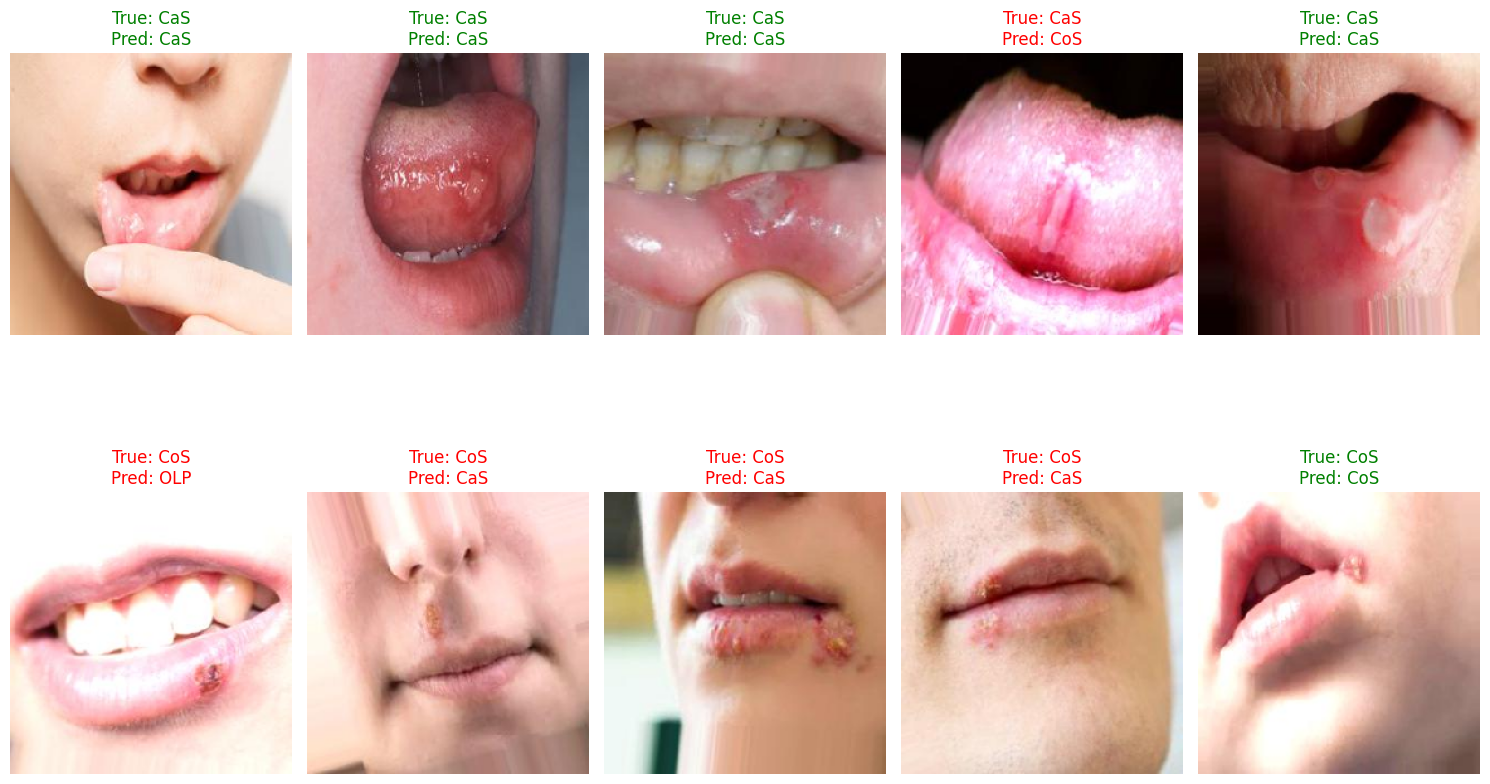

In [ ]:
import matplotlib.pyplot as plt

# Create a figure to display 10 sample test images
plt.figure(figsize=(15, 10))

# Loop through the first 10 images in the test generator
for i in range(10):
    img, label = test_gen[i][0][0], test_gen[i][1][0]        # Get image and true label
    true = class_labels[np.argmax(label)]                    # Convert one-hot label to class name
    pred = class_labels[np.argmax(pred_probs[i])]            # Get predicted class from probabilities

    # Choose color for the title: green if correct, red if wrong
    color = "green" if pred == true else "red"

    # Plot the image in a 2x5 grid
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)                                          # Show the image
    plt.title(f"True: {true}\nPred: {pred}", color=color)    # Display true and predicted class
    plt.axis("off")                                          # Hide axis

# Adjust layout and display all subplots
plt.tight_layout()
plt.show()


In [31]:
model.save("/content/teeth_model.h5")
